My goal for the project was to test my understanding of what makes people happy. As you can see in the import.py file, I picked out several variables as proxies for different factors that I thought might be important. In some cases I just wanted to know what the impact was (media and politics for example).

After reading in and cleaning the data in "import.py", I tried to pick out one or two variables in each topic. To do so, I looked at correlation matrices for quantitative variables and boxplot graphs plus chi squared tests for categorical variables.

After picking out a variable, I ran weighted least squares (WLS) regressions to evaluate the relationship between factors and happiness. I chose to use regression analysis because it is simple and interpretable. I chose WLS because it enables the use of the weights provided in the dataset to account for bias in sampling.

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

DATA_PATH = "../data/out/full_data_clean.pickle"

data = pd.read_pickle(DATA_PATH)

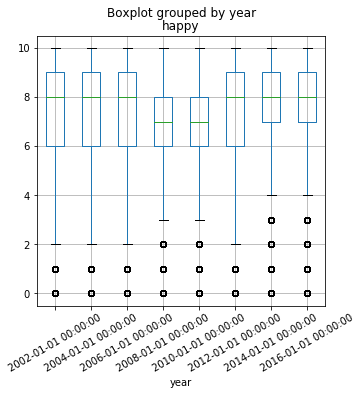

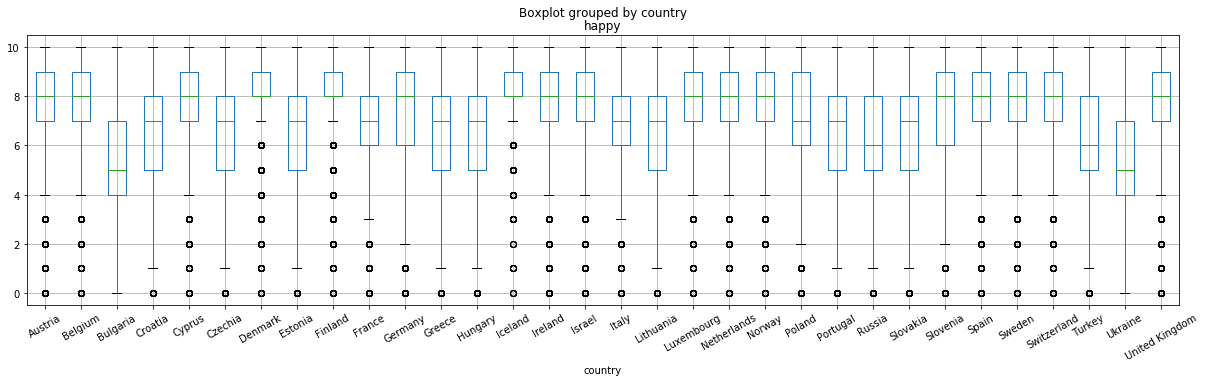

In [3]:
# Baseline Variables
data.boxplot(column='happy', 
             by='year',
             figsize = (5,5),
             grid=True,
             rot = 30)
data.boxplot(column='happy', 
             by='country',
             figsize = (20,5),
             grid=True,
             rot = 30)

In [4]:
# WLS regression setup
def get_wls_data(data, endog, num_exog, cat_exog, weight):
    """ 
    Returns components for wls regression 
    (endog series, exog matrix, weight series)
    """
    assert(isinstance(endog, str))
    assert(isinstance(num_exog, list))
    assert(isinstance(cat_exog, list))
    assert(isinstance(weight, str))
    cols = num_exog + cat_exog + [endog, weight]
    subset = data[cols].dropna(axis=0, how='any')
    exog_data = get_exog_df(subset, num_exog, cat_exog)
    X = sm.add_constant(exog_data)
    y = subset[endog]
    weight = subset[weight]
    return y, X, weight


def get_exog_df(data, num_exog, cat_exog):
    """ 
    Returns matrix of endogenous variables, 
    creating dummy variables for categorical vars.
    """
    num_exog_data = data[num_exog]
    cat_exog_dfs = []
    for col in cat_exog:
        cat_exog_df = pd.get_dummies(data[col],
                                     prefix=col,
                                     drop_first=True)
        assert cat_exog_df.shape[0] == data.shape[0]
        cat_exog_dfs.append(cat_exog_df)
    exog_df = pd.concat([num_exog_data] + cat_exog_dfs, axis=1)
    assert exog_df.shape[0] == data.shape[0]
    return exog_df

In [5]:
y, X, weight = get_wls_data(data, 'happy', [], ['country'], 'pspwght')
wls_model = sm.WLS(y, X, weights=weight)
results = wls_model.fit()
results.summary()

/Users/cguerner/data/ess/venv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                  happy   R-squared:                       0.106
Model:                            WLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     1424.
Date:                Fri, 13 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:16:43   Log-Likelihood:            -7.8974e+05
No. Observations:              372156   AIC:                         1.580e+06
Df Residuals:                  372124   BIC:                         1.580e+06
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      7.5409      0.018    410.249      0.000       7.505       7.577
country_Belgium            0.1579      0.024      6.506      0.000       0.110       0.206
country_Bulgaria          -1.9456      0.028    -69.765      0.000      -2.000      -1.891
country_Croatia           -0.7229      0.039    -18.684      0.000      -0.799      -0.647
country_Cyprus            -0.0859      0.034     -2.516      0.012      -0.153      -0.019
country_Czechia           -0.6762      0.024    -28.154      0.000      -0.723      -0.629
country_Denmark            0.7580      0.026     29.244      0.000       0.707       0.809
country_Estonia           -0.6726      0.025    -27.276      0.000      -0.721      -0.624
country_Finland            0.4967      0.024     20.978      0.000       0.450       0.543
country_France            -0.2559      0.024    -10.652      0.000      -0.303      -0.209
country_Germany           -0.1763      0.022     -7.946      0.000      -0.220      -0.133
country_Greece            -1.0342      0.027    -38.837      0.000      -1.086      -0.982
country_Hungary           -1.1863      0.025    -48.042      0.000      -1.235      -1.138
country_Iceland            0.6831      0.045     15.336      0.000       0.596       0.770
country_Ireland           -0.0493      0.023     -2.131      0.033      -0.095      -0.004
country_Israel             0.1081      0.024      4.479      0.000       0.061       0.155
country_Italy             -0.5856      0.033    -17.701      0.000      -0.650      -0.521
country_Lithuania         -1.1449      0.028    -41.240      0.000      -1.199      -1.090
country_Luxembourg         0.2987      0.038      7.784      0.000       0.223       0.374
country_Netherlands        0.3141      0.024     13.094      0.000       0.267       0.361
country_Norway             0.4474      0.025     18.112      0.000       0.399       0.496
country_Poland            -0.4850      0.024    -19.861      0.000      -0.533      -0.437
country_Portugal          -0.7624      0.024    -31.676      0.000      -0.810      -0.715
country_Russia            -1.3581      0.025    -54.031      0.000      -1.407      -1.309
country_Slovakia          -0.8935      0.027    -32.695      0.000      -0.947      -0.840
country_Slovenia          -0.3245      0.026    -12.541      0.000      -0.375      -0.274
country_Spain              0.0320      0.024      1.341      0.180      -0.015       0.079
country_Sweden             0.3183      0.024     13.177      0.000       0.271       0.366
country_Switzerland        0.5380      0.024     21.999      0.000       0.490       0.586
country_Turkey            -1.4852      0.035    -42.905      0.000      -1.553      -1.417
country_Ukraine           -1.6810      0.027    -63.156      0.000      -1.733  

In [6]:
y, X, weight = get_wls_data(data, 'happy', [], ['year'], 'pspwght')
wls_model = sm.WLS(y, X, weights=weight)
results = wls_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                  happy   R-squared:                       0.005
Model:                            WLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     288.4
Date:                Fri, 13 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:16:43   Log-Likelihood:            -8.0959e+05
No. Observations:              372156   AIC:                         1.619e+06
Df Residuals:                  372148   BIC:                         1.619e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        7.4146      0.010    767.776      0.000       7.396       7.434
year_2004-01-01 00:00:00    -0.1677      0.013    -12.566      0.000      -0.194      -0.142
year_2006-01-01 00:00:00    -0.2014      0.014    -14.798      0.000      -0.228      -0.175
year_2008-01-01 00:00:00    -0.3345      0.013    -25.654      0.000      -0.360      -0.309
year_2010-01-01 00:00:00    -0.3476      0.013    -26.687      0.000      -0.373      -0.322
year_2012-01-01 00:00:00    -0.2165      0.013    -16.576      0.000      -0.242      -0.191
year_2014-01-01 00:00:00     0.0160      0.014      1.150      0.250      -0.011       0.043
year_2016-01-01 00:00:00     0.0565      0.014      4.166      0.000       0.030       0.083
==============================================================================
Omnibus:                    63942.698   Durbin-Watson:                   1.644
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           135669.765
Skew:                          -1.021   Prob(JB):                         0.00
Kurtosis:                       5.140   Cond. No.                         9.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
y, X, weight = get_wls_data(data, 'happy', [], ['country', 'year'], 'pspwght')
wls_model = sm.WLS(y, X, weights=weight)
results = wls_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                  happy   R-squared:                       0.107
Model:                            WLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     1177.
Date:                Fri, 13 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:16:45   Log-Likelihood:            -7.8948e+05
No. Observations:              372156   AIC:                         1.579e+06
Df Residuals:                  372117   BIC:                         1.579e+06
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        7.4834      0.020    371.887      0.000       7.444       7.523
country_Belgium              0.1675      0.024      6.868      0.000       0.120       0.215
country_Bulgaria            -1.9077      0.028    -67.089      0.000      -1.963      -1.852
country_Croatia             -0.6638      0.039    -16.856      0.000      -0.741      -0.587
country_Cyprus              -0.0461      0.035     -1.337      0.181      -0.114       0.022
country_Czechia             -0.6753      0.024    -27.888      0.000      -0.723      -0.628
country_Denmark              0.7931      0.026     30.401      0.000       0.742       0.844
country_Estonia             -0.6756      0.025    -27.184      0.000      -0.724      -0.627
country_Finland              0.5065      0.024     21.283      0.000       0.460       0.553
country_France              -0.2497      0.024    -10.344      0.000      -0.297      -0.202
country_Germany             -0.1667      0.022     -7.475      0.000      -0.210      -0.123
country_Greece              -0.9790      0.027    -36.290      0.000      -1.032      -0.926
country_Hungary             -1.1782      0.025    -47.492      0.000      -1.227      -1.130
country_Iceland              0.6190      0.045     13.828      0.000       0.531       0.707
country_Ireland             -0.0482      0.023     -2.069      0.039      -0.094      -0.003
country_Israel               0.1012      0.024      4.147      0.000       0.053       0.149
country_Italy               -0.6700      0.033    -20.038      0.000      -0.736      -0.604
country_Lithuania           -1.1837      0.028    -42.073      0.000      -1.239      -1.129
country_Luxembourg           0.3502      0.039      9.058      0.000       0.274       0.426
country_Netherlands          0.3269      0.024     13.572      0.000       0.280       0.374
country_Norway               0.4600      0.025     18.550      0.000       0.411       0.509
country_Poland              -0.4742      0.025    -19.334      0.000      -0.522      -0.426
country_Portugal            -0.7423      0.024    -30.630      0.000      -0.790      -0.695
country_Russia              -1.3599      0.026    -53.297      0.000      -1.410      -1.310
country_Slovakia            -0.8528      0.028    -30.805      0.000      -0.907      -0.799
country_Slovenia            -0.3124      0.026    -12.032      0.000      -0.363      -0.262
country_Spain                0.0419      0.024      1.742      0.082      -0.005       0.089
country_Sweden               0.3325      0.024     13.709      0.000       0.285       0.380
country_Switzerland          0.5530      0.025     22.525      0.000       0.505       0.601
country_Turkey              -1.4289      0.035    -40.605      0.000      -1.498      -1.360
country_Ukrain

**Combined with country, the year dummies don't appear to have a significant impact. I will use only country going forward.**

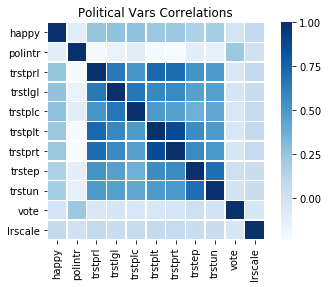

In [8]:
# Correlation heatmap
def get_corr_heatmap(cols, title):
    """ Returns Correlation Heatmap Graph """
    corr_matrix = data[cols].corr()
    ax = plt.axes()
    ax.set_title(title)
    cm = sns.heatmap(corr_matrix,
                    linewidths=0.5,
                    cbar=True,
                    cmap="Blues",
                    xticklabels=True,
                    yticklabels=True,
                    square=True,
                    annot=False,
                    ax=ax)
    cm.set_xticklabels(cm.get_xticklabels(), rotation=90)
    return cm

# Politics Vars
cols = ['happy', 'polintr', 'trstprl', 'trstlgl', 'trstplc', 'trstplt', 
        'trstprt', 'trstep', 'trstun', 'vote', 'lrscale']

g = get_corr_heatmap(cols, 'Political Vars Correlations')

In [9]:
y, X, weight = get_wls_data(data, 'happy', ['trstplc', 'polintr','lrscale'], ['country'], 'pspwght')
wls_model = sm.WLS(y, X, weights=weight)
results = wls_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                  happy   R-squared:                       0.138
Model:                            WLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     1485.
Date:                Fri, 13 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:16:46   Log-Likelihood:            -6.5328e+05
No. Observations:              316512   AIC:                         1.307e+06
Df Residuals:                  316477   BIC:                         1.307e+06
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      6.5376      0.023    278.260      0.000       6.492       6.584
trstplc                    0.1369      0.001     99.182      0.000       0.134       0.140
polintr                   -0.0708      0.004    -19.109      0.000      -0.078      -0.064
lrscale                    0.0602      0.001     41.007      0.000       0.057       0.063
country_Belgium            0.2504      0.024     10.285      0.000       0.203       0.298
country_Bulgaria          -1.4885      0.030    -49.095      0.000      -1.548      -1.429
country_Croatia           -0.4089      0.042     -9.790      0.000      -0.491      -0.327
country_Cyprus             0.0887      0.036      2.442      0.015       0.017       0.160
country_Czechia           -0.4813      0.025    -19.555      0.000      -0.530      -0.433
country_Denmark            0.5448      0.026     21.054      0.000       0.494       0.596
country_Estonia           -0.5603      0.026    -21.966      0.000      -0.610      -0.510
country_Finland            0.2456      0.024     10.331      0.000       0.199       0.292
country_France            -0.1676      0.024     -6.955      0.000      -0.215      -0.120
country_Germany           -0.1827      0.022     -8.170      0.000      -0.227      -0.139
country_Greece            -0.8880      0.028    -31.654      0.000      -0.943      -0.833
country_Hungary           -1.0000      0.026    -39.099      0.000      -1.050      -0.950
country_Iceland            0.4858      0.044     11.052      0.000       0.400       0.572
country_Ireland           -0.0513      0.024     -2.161      0.031      -0.098      -0.005
country_Israel             0.2482      0.025     10.102      0.000       0.200       0.296
country_Italy             -0.4698      0.036    -13.028      0.000      -0.540      -0.399
country_Lithuania         -0.9935      0.030    -32.851      0.000      -1.053      -0.934
country_Luxembourg         0.3203      0.040      7.930      0.000       0.241       0.399
country_Netherlands        0.3145      0.024     13.118      0.000       0.267       0.361
country_Norway             0.3324      0.025     13.548      0.000       0.284       0.380
country_Poland            -0.2773      0.025    -10.958      0.000      -0.327      -0.228
country_Portugal          -0.5343      0.026    -20.858      0.000      -0.585      -0.484
country_Russia            -0.9693      0.028    -34.572      0.000      -1.024      -0.914
country_Slovakia          -0.5727      0.028    -20.350      0.000      -0.628      -0.518
country_Slovenia          -0.1046      0.027     -3.818      0.000      -0.158      -0.051
country_Spain              0.1557      0.024      6.373      0.000       0.108       0.204
country_Sweden             0.2615      0.024     10.848      0.000       0.214  

**trstplc (trust in police) looks like the strongest indicator here.**

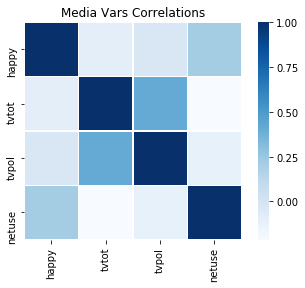

In [10]:
# Media Vars
cols = ['happy', 'tvtot', 'tvpol', 'netuse']

mcm = get_corr_heatmap(cols, 'Media Vars Correlations')

In [11]:
# Based on results above, looks like tvtot/tvpol and netuse can be included
y, X, weight = get_wls_data(data, 'happy', ['tvtot', 'netuse'], ['country'], 'pspwght')
wls_model = sm.WLS(y, X, weights=weight)
results = wls_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                  happy   R-squared:                       0.132
Model:                            WLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     1058.
Date:                Fri, 13 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:16:47   Log-Likelihood:            -4.8673e+05
No. Observations:              228879   AIC:                         9.735e+05
Df Residuals:                  228845   BIC:                         9.739e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      7.3259      0.025    290.904      0.000       7.277       7.375
tvtot                     -0.0203      0.002    -10.065      0.000      -0.024      -0.016
netuse                     0.0856      0.001     61.264      0.000       0.083       0.088
country_Belgium            0.1474      0.031      4.803      0.000       0.087       0.208
country_Bulgaria          -1.8214      0.034    -53.572      0.000      -1.888      -1.755
country_Croatia           -0.6963      0.041    -16.796      0.000      -0.778      -0.615
country_Cyprus             0.0675      0.041      1.656      0.098      -0.012       0.147
country_Czechia           -0.6306      0.031    -20.367      0.000      -0.691      -0.570
country_Denmark            0.6580      0.032     20.672      0.000       0.596       0.720
country_Estonia           -0.8989      0.033    -27.552      0.000      -0.963      -0.835
country_Finland            0.3925      0.030     13.099      0.000       0.334       0.451
country_France            -0.4024      0.034    -11.797      0.000      -0.469      -0.336
country_Germany           -0.3893      0.029    -13.349      0.000      -0.446      -0.332
country_Greece            -0.8705      0.030    -28.707      0.000      -0.930      -0.811
country_Hungary           -1.1514      0.032    -36.494      0.000      -1.213      -1.090
country_Iceland            0.7602      0.084      9.095      0.000       0.596       0.924
country_Ireland            0.0379      0.030      1.275      0.202      -0.020       0.096
country_Israel            -0.0483      0.032     -1.496      0.135      -0.112       0.015
country_Italy             -0.8530      0.060    -14.277      0.000      -0.970      -0.736
country_Lithuania         -1.3855      0.049    -28.192      0.000      -1.482      -1.289
country_Luxembourg         0.3327      0.041      8.112      0.000       0.252       0.413
country_Netherlands        0.1614      0.030      5.347      0.000       0.102       0.221
country_Norway             0.2962      0.031      9.578      0.000       0.236       0.357
country_Poland            -0.5820      0.031    -18.888      0.000      -0.642      -0.522
country_Portugal          -0.7101      0.030    -23.758      0.000      -0.769      -0.652
country_Russia            -1.2329      0.032    -38.237      0.000      -1.296      -1.170
country_Slovakia          -0.8947      0.033    -27.476      0.000      -0.959      -0.831
country_Slovenia          -0.3678      0.032    -11.361      0.000      -0.431      -0.304
country_Spain              0.0695      0.030      2.304      0.021       0.010       0.129
country_Sweden             0.1969      0.030      6.498      0.000       0.138       0.256
country_Switzerland        0.4349      0.030     14.293      0.000       0.375  

**I keep netuse (internet usage in hours per day) here**

In [12]:
y, X, weight = get_wls_data(data, 'happy', ['tvpol', 'netuse'], ['country'], 'pspwght')
wls_model = sm.WLS(y, X, weights=weight)
results = wls_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                  happy   R-squared:                       0.132
Model:                            WLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     1013.
Date:                Fri, 13 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:16:48   Log-Likelihood:            -4.6726e+05
No. Observations:              220418   AIC:                         9.346e+05
Df Residuals:                  220384   BIC:                         9.349e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      7.2853      0.025    292.839      0.000       7.237       7.334
tvpol                     -0.0190      0.003     -6.065      0.000      -0.025      -0.013
netuse                     0.0856      0.001     60.915      0.000       0.083       0.088
country_Belgium            0.1364      0.031      4.385      0.000       0.075       0.197
country_Bulgaria          -1.8372      0.034    -53.378      0.000      -1.905      -1.770
country_Croatia           -0.6846      0.042    -16.279      0.000      -0.767      -0.602
country_Cyprus             0.0595      0.041      1.451      0.147      -0.021       0.140
country_Czechia           -0.6487      0.031    -20.703      0.000      -0.710      -0.587
country_Denmark            0.6571      0.032     20.401      0.000       0.594       0.720
country_Estonia           -0.9114      0.033    -27.487      0.000      -0.976      -0.846
country_Finland            0.3859      0.031     12.637      0.000       0.326       0.446
country_France            -0.4140      0.035    -11.944      0.000      -0.482      -0.346
country_Germany           -0.4047      0.030    -13.663      0.000      -0.463      -0.347
country_Greece            -0.9003      0.031    -29.319      0.000      -0.960      -0.840
country_Hungary           -1.1605      0.032    -36.256      0.000      -1.223      -1.098
country_Iceland            0.7502      0.084      8.963      0.000       0.586       0.914
country_Ireland            0.0286      0.030      0.948      0.343      -0.031       0.088
country_Israel            -0.1421      0.034     -4.212      0.000      -0.208      -0.076
country_Italy             -0.8404      0.060    -13.993      0.000      -0.958      -0.723
country_Lithuania         -1.3680      0.051    -27.088      0.000      -1.467      -1.269
country_Luxembourg         0.3249      0.042      7.815      0.000       0.243       0.406
country_Netherlands        0.1553      0.031      5.075      0.000       0.095       0.215
country_Norway             0.3029      0.031      9.663      0.000       0.241       0.364
country_Poland            -0.5699      0.031    -18.178      0.000      -0.631      -0.508
country_Portugal          -0.7074      0.030    -23.371      0.000      -0.767      -0.648
country_Russia            -1.2316      0.033    -37.580      0.000      -1.296      -1.167
country_Slovakia          -0.9016      0.033    -27.300      0.000      -0.966      -0.837
country_Slovenia          -0.3647      0.033    -11.083      0.000      -0.429      -0.300
country_Spain              0.0675      0.031      2.206      0.027       0.008       0.127
country_Sweden             0.2089      0.031      6.794      0.000       0.149       0.269
country_Switzerland        0.4285      0.031     13.748      0.000       0.367  

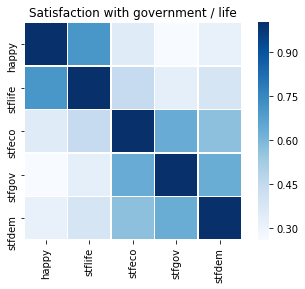

In [13]:
# Satisfaction with government / life
# stflife: satisfied with life
# stfeco: satisfied with economy
# stfgov: satisfied with government
# stfdem: satisfied with democracy
cols = ['happy', 'stflife', 'stfeco', 'stfgov', 'stfdem']

scm = get_corr_heatmap(cols, 'Satisfaction with government / life')

In [14]:
y, X, weight = get_wls_data(data, 'happy', ['stfdem'], ['country'], 'pspwght')
wls_model = sm.WLS(y, X, weights=weight)
results = wls_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                  happy   R-squared:                       0.149
Model:                            WLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     1957.
Date:                Fri, 13 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:16:50   Log-Likelihood:            -7.4311e+05
No. Observations:              356531   AIC:                         1.486e+06
Df Residuals:                  356498   BIC:                         1.487e+06
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      6.5086      0.020    331.957      0.000       6.470       6.547
stfdem                     0.1807      0.001    136.715      0.000       0.178       0.183
country_Belgium            0.2081      0.024      8.760      0.000       0.162       0.255
country_Bulgaria          -1.4071      0.028    -50.339      0.000      -1.462      -1.352
country_Croatia           -0.3604      0.038     -9.448      0.000      -0.435      -0.286
country_Cyprus            -0.1107      0.034     -3.300      0.001      -0.176      -0.045
country_Czechia           -0.5300      0.024    -22.478      0.000      -0.576      -0.484
country_Denmark            0.4954      0.025     19.483      0.000       0.446       0.545
country_Estonia           -0.4827      0.024    -19.800      0.000      -0.531      -0.435
country_Finland            0.3731      0.023     16.066      0.000       0.328       0.419
country_France            -0.0546      0.024     -2.320      0.020      -0.101      -0.008
country_Germany           -0.1450      0.022     -6.676      0.000      -0.188      -0.102
country_Greece            -0.8698      0.026    -33.416      0.000      -0.921      -0.819
country_Hungary           -0.8889      0.024    -36.283      0.000      -0.937      -0.841
country_Iceland            0.6684      0.044     15.301      0.000       0.583       0.754
country_Ireland            0.0339      0.023      1.487      0.137      -0.011       0.079
country_Israel             0.1931      0.024      8.133      0.000       0.147       0.240
country_Italy             -0.3046      0.033     -9.315      0.000      -0.369      -0.241
country_Lithuania         -0.9027      0.027    -32.977      0.000      -0.956      -0.849
country_Luxembourg         0.1455      0.039      3.771      0.000       0.070       0.221
country_Netherlands        0.2532      0.023     10.784      0.000       0.207       0.299
country_Norway             0.2708      0.024     11.205      0.000       0.223       0.318
country_Poland            -0.2288      0.024     -9.467      0.000      -0.276      -0.181
country_Portugal          -0.4159      0.024    -17.464      0.000      -0.463      -0.369
country_Russia            -1.0123      0.025    -39.842      0.000      -1.062      -0.963
country_Slovakia          -0.6631      0.027    -24.693      0.000      -0.716      -0.610
country_Slovenia          -0.0026      0.026     -0.100      0.920      -0.053       0.048
country_Spain              0.1485      0.023      6.318      0.000       0.102       0.195
country_Sweden             0.1855      0.024      7.831      0.000       0.139       0.232
country_Switzerland        0.3236      0.024     13.472      0.000       0.276       0.371
country_Turkey            -1.2708      0.035    -36.622      0.000      -1.339  

**I will keep stfdem here.**

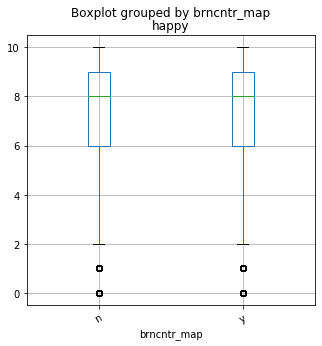

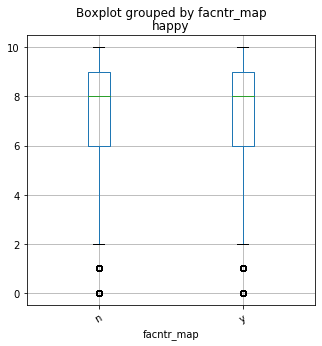

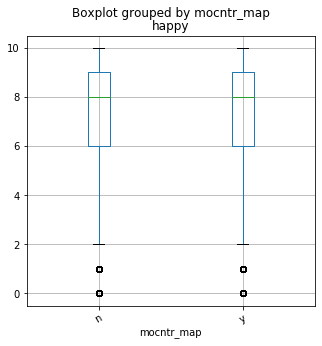

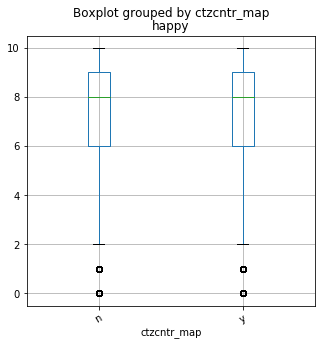

In [15]:
# Born in Country/Citizenship
data.boxplot(column='happy', 
             by='brncntr_map',
             figsize = (5,5),
             grid=True,
             rot = 30)
data.boxplot(column='happy', 
             by='facntr_map',
             figsize = (5,5),
             grid=True,
             rot = 30)
data.boxplot(column='happy', 
             by='mocntr_map',
             figsize = (5,5),
             grid=True,
             rot = 30)
data.boxplot(column='happy', 
             by='ctzcntr_map',
             figsize = (5,5),
             grid=True,
             rot = 30)

In [16]:
# Birth / citizenship variables are very likely to be correlated with one another
def get_chi_squared(data, catseries1, catseries2):
    table = sm.stats.Table.from_data(data[[catseries1, catseries2]])
    rslt = table.test_nominal_association()
    contribs = table.chi2_contribs
    return rslt, contribs
    
rslt, contribs = get_chi_squared(data, 'brncntr_map', 'ctzcntr_map')
print(rslt)
print(contribs)
# Null hypothesis of independence is rejected, can only use one of these

df          1
pvalue      0.0
statistic   112014.80057091101
ctzcntr_map             n            y
brncntr_map                           
n            97268.394150  4167.460338
y            10144.313394   434.632689


In [17]:
y, X, weight = get_wls_data(data, 'happy', [], ['brncntr_map', 'country'], 'pspwght')
wls_model = sm.WLS(y, X, weights=weight)
results = wls_model.fit()
results.summary()

/Users/cguerner/data/ess/venv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                  happy   R-squared:                       0.107
Model:                            WLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     1387.
Date:                Fri, 13 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:16:52   Log-Likelihood:            -7.8889e+05
No. Observations:              371812   AIC:                         1.578e+06
Df Residuals:                  371779   BIC:                         1.578e+06
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      7.3834      0.021    355.304      0.000       7.343       7.424
brncntr_map_y              0.1737      0.011     16.193      0.000       0.153       0.195
country_Belgium            0.1620      0.024      6.674      0.000       0.114       0.210
country_Bulgaria          -1.9607      0.028    -70.271      0.000      -2.015      -1.906
country_Croatia           -0.7186      0.039    -18.559      0.000      -0.795      -0.643
country_Cyprus            -0.0888      0.034     -2.602      0.009      -0.156      -0.022
country_Czechia           -0.6907      0.024    -28.715      0.000      -0.738      -0.644
country_Denmark            0.7531      0.026     29.055      0.000       0.702       0.804
country_Estonia           -0.6596      0.025    -26.724      0.000      -0.708      -0.611
country_Finland            0.4866      0.024     20.546      0.000       0.440       0.533
country_France            -0.2534      0.024    -10.547      0.000      -0.300      -0.206
country_Germany           -0.1724      0.022     -7.770      0.000      -0.216      -0.129
country_Greece            -1.0334      0.027    -38.791      0.000      -1.086      -0.981
country_Hungary           -1.1993      0.025    -48.542      0.000      -1.248      -1.151
country_Iceland            0.6762      0.045     15.184      0.000       0.589       0.763
country_Ireland           -0.0426      0.023     -1.839      0.066      -0.088       0.003
country_Israel             0.1411      0.024      5.819      0.000       0.094       0.189
country_Italy             -0.5899      0.033    -17.828      0.000      -0.655      -0.525
country_Lithuania         -1.1553      0.028    -41.609      0.000      -1.210      -1.101
country_Luxembourg         0.3385      0.038      8.805      0.000       0.263       0.414
country_Netherlands        0.3123      0.024     13.018      0.000       0.265       0.359
country_Norway             0.4473      0.025     18.101      0.000       0.399       0.496
country_Poland            -0.4990      0.024    -20.418      0.000      -0.547      -0.451
country_Portugal          -0.7678      0.024    -31.890      0.000      -0.815      -0.721
country_Russia            -1.3632      0.025    -54.230      0.000      -1.412      -1.314
country_Slovakia          -0.9066      0.027    -33.145      0.000      -0.960      -0.853
country_Slovenia          -0.3270      0.026    -12.628      0.000      -0.378      -0.276
country_Spain              0.0316      0.024      1.324      0.186      -0.015       0.078
country_Sweden             0.3229      0.024     13.367      0.000       0.276       0.370
country_Switzerland        0.5597      0.024     22.855      0.000       0.512       0.608
country_Turkey            -1.4995      0.035    -43.311      0.000      -1.567  

In [18]:
y, X, weight = get_wls_data(data, 'happy', [], ['ctzcntr_map', 'country'], 'pspwght')
wls_model = sm.WLS(y, X, weights=weight)
results = wls_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                  happy   R-squared:                       0.106
Model:                            WLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     1383.
Date:                Fri, 13 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:16:53   Log-Likelihood:            -7.8919e+05
No. Observations:              371940   AIC:                         1.578e+06
Df Residuals:                  371907   BIC:                         1.579e+06
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      7.3766      0.024    312.966      0.000       7.330       7.423
ctzcntr_map_y              0.1742      0.016     11.215      0.000       0.144       0.205
country_Belgium            0.1598      0.024      6.583      0.000       0.112       0.207
country_Bulgaria          -1.9551      0.028    -70.078      0.000      -2.010      -1.900
country_Croatia           -0.7283      0.039    -18.801      0.000      -0.804      -0.652
country_Cyprus            -0.0877      0.034     -2.571      0.010      -0.155      -0.021
country_Czechia           -0.6841      0.024    -28.456      0.000      -0.731      -0.637
country_Denmark            0.7537      0.026     29.072      0.000       0.703       0.804
country_Estonia           -0.6548      0.025    -26.487      0.000      -0.703      -0.606
country_Finland            0.4897      0.024     20.675      0.000       0.443       0.536
country_France            -0.2576      0.024    -10.723      0.000      -0.305      -0.211
country_Germany           -0.1759      0.022     -7.927      0.000      -0.219      -0.132
country_Greece            -1.0334      0.027    -38.800      0.000      -1.086      -0.981
country_Hungary           -1.1959      0.025    -48.402      0.000      -1.244      -1.147
country_Iceland            0.6752      0.045     15.153      0.000       0.588       0.762
country_Ireland           -0.0459      0.023     -1.981      0.048      -0.091      -0.000
country_Israel             0.0985      0.024      4.074      0.000       0.051       0.146
country_Italy             -0.5889      0.033    -17.777      0.000      -0.654      -0.524
country_Lithuania         -1.1539      0.028    -41.552      0.000      -1.208      -1.100
country_Luxembourg         0.3450      0.039      8.933      0.000       0.269       0.421
country_Netherlands        0.3085      0.024     12.857      0.000       0.261       0.355
country_Norway             0.4471      0.025     18.098      0.000       0.399       0.496
country_Poland            -0.4951      0.024    -20.257      0.000      -0.543      -0.447
country_Portugal          -0.7674      0.024    -31.874      0.000      -0.815      -0.720
country_Russia            -1.3667      0.025    -54.350      0.000      -1.416      -1.317
country_Slovakia          -0.9023      0.027    -32.989      0.000      -0.956      -0.849
country_Slovenia          -0.3330      0.026    -12.864      0.000      -0.384      -0.282
country_Spain              0.0334      0.024      1.396      0.163      -0.013       0.080
country_Sweden             0.3144      0.024     13.016      0.000       0.267       0.362
country_Switzerland        0.5543      0.025     22.618      0.000       0.506       0.602
country_Turkey            -1.4951      0.035    -43.182      0.000      -1.563  

**As expected, results are very similar. I'll keep brncntr_map because of the slightly better R2.**

**With more time I would have continued with the remainder of the types of variables (health, income, etc.) to identify the best proxies for these different factors.**

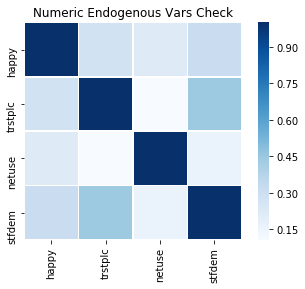

In [19]:
# again, quick correlation check
cols = ['happy', 'trstplc', 'netuse', 'stfdem']

scm = get_corr_heatmap(cols, 'Numeric Endogenous Vars Check')

In [20]:
y, X, weight = get_wls_data(data, 'happy', ['trstplc', 'netuse', 'stfdem'], ['brncntr_map', 'country'], 'pspwght')
wls_model = sm.WLS(y, X, weights=weight)
results = wls_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                  happy   R-squared:                       0.182
Model:                            WLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     1371.
Date:                Fri, 13 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:16:54   Log-Likelihood:            -4.4978e+05
No. Observations:              216099   AIC:                         8.996e+05
Df Residuals:                  216063   BIC:                         9.000e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5.6286      0.029    190.903      0.000       5.571       5.686
trstplc                    0.0943      0.002     53.759      0.000       0.091       0.098
netuse                     0.0751      0.001     55.394      0.000       0.072       0.078
stfdem                     0.1419      0.002     77.639      0.000       0.138       0.145
brncntr_map_y              0.2581      0.014     18.434      0.000       0.231       0.285
country_Belgium            0.2451      0.030      8.159      0.000       0.186       0.304
country_Bulgaria          -1.1735      0.034    -34.162      0.000      -1.241      -1.106
country_Croatia           -0.2267      0.041     -5.537      0.000      -0.307      -0.146
country_Cyprus             0.0530      0.040      1.319      0.187      -0.026       0.132
country_Czechia           -0.3736      0.031    -12.244      0.000      -0.433      -0.314
country_Denmark            0.3241      0.031     10.390      0.000       0.263       0.385
country_Estonia           -0.6608      0.033    -20.284      0.000      -0.725      -0.597
country_Finland            0.1314      0.029      4.459      0.000       0.074       0.189
country_France            -0.1604      0.033     -4.821      0.000      -0.226      -0.095
country_Germany           -0.3530      0.029    -12.362      0.000      -0.409      -0.297
country_Greece            -0.6834      0.030    -23.057      0.000      -0.741      -0.625
country_Hungary           -0.7754      0.031    -24.672      0.000      -0.837      -0.714
country_Iceland            0.6618      0.082      8.051      0.000       0.501       0.823
country_Ireland            0.1034      0.029      3.528      0.000       0.046       0.161
country_Israel             0.1933      0.032      6.012      0.000       0.130       0.256
country_Italy             -0.7857      0.059    -13.259      0.000      -0.902      -0.670
country_Lithuania         -0.8837      0.049    -17.982      0.000      -0.980      -0.787
country_Luxembourg         0.2507      0.041      6.086      0.000       0.170       0.331
country_Netherlands        0.1502      0.029      5.094      0.000       0.092       0.208
country_Norway             0.1406      0.030      4.654      0.000       0.081       0.200
country_Poland            -0.2458      0.031     -8.030      0.000      -0.306      -0.186
country_Portugal          -0.3197      0.030    -10.776      0.000      -0.378      -0.262
country_Russia            -0.6938      0.033    -21.042      0.000      -0.758      -0.629
country_Slovakia          -0.5563      0.032    -17.323      0.000      -0.619      -0.493
country_Slovenia          -0.0058      0.032     -0.181      0.856      -0.069       0.057
country_Spain              0.1182      0.030      3.982      0.000       0.060  

**Looks like there might be an issue with multicollinearity with these variables. Including both satisfaction with democracy and trust in police is probably not possible.**

**As a next step I would look to include other indicators (especially wealth and health) and hopefully increase the R2. For now, I conclude that:**
- **trust in police, internet use and satisfaction with democracy have a positive impact on happiness.**
- **being born in the country has a strong positive effect on happiness compared to these other variables.**